In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

tf.set_random_seed(777)

1.12.0


In [2]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

In [3]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images, test_images = train_images/255., test_images/255.

In [6]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=keras.initializers.he_normal()))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer=keras.initializers.he_normal()))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=keras.initializers.he_normal()))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=keras.initializers.he_normal()))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=keras.initializers.he_normal()))

In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
             loss=keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, batch_size=batch_size, epochs=training_epochs,
         validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2296 - acc: 0.9297 - val_loss: 0.1205 - val_acc: 0.9625
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0921 - acc: 0.9718 - val_loss: 0.0850 - val_acc: 0.9725
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0648 - acc: 0.9792 - val_loss: 0.0905 - val_acc: 0.9723
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0467 - acc: 0.9850 - val_loss: 0.0834 - val_acc: 0.9755
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.0377 - acc: 0.9876 - val_loss: 0.1102 - val_acc: 0.9679
Epoch 6/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0329 - acc: 0.9894 - val_loss: 0.0894 - val_acc: 0.9769
Epoch 7/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.0270 - acc: 0.9914 - val_loss: 0.1090 - val_acc

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  200960    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  65792     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  32896     
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
__________

In [10]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/step


[0.08145921349145065, 0.9826]

In [11]:
predictions = model.predict(test_images)

In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(10), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

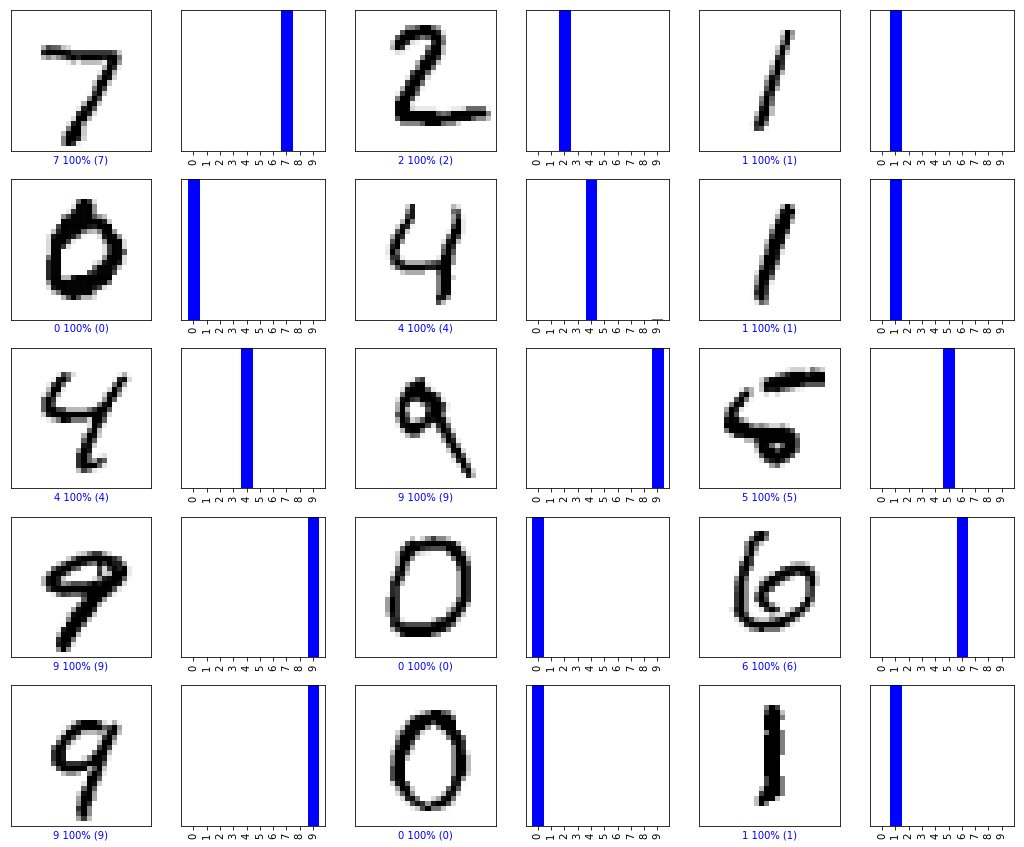

In [13]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(3*2*num_cols, 3*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)